# 🧩 Part 1: Classification - Employee Churn Management


Employee churn, often referred to as attrition or turnover, is a critical concern for organizations across various industries. It entails the departure of valuable talent from an organization, which not only incurs significant financial costs but also disrupts productivity and can have a negative impact on team morale. Predicting employee churn has thus become a vital task for organizations seeking to proactively address this issue. This problem is inherently a binary classification task, it involves categorizing employees into two distinct groups: those likely to churn and those likely to stay with the organization, making it a quintessential example of binary classification in machine learning.

## Objective

This assignment aims to develop classification models (KNN, Decision Tree and Random Forests) using Python to predict employee churn. The primary objective is to utilize historical employee data to build a predictive model that can accurately identify individuals at risk of leaving the organization. By doing so, organizations can implement targeted retention strategies and interventions, ultimately reducing the overall churn rate and fostering a more stable and motivated workforce.

## Dataset

For this assignment, you will be working with the churn.csv dataset, which focuses on employee churn prediction. The dataset contains information on various attributes related to employee performance and experiences within the company.

This dataset comprises 14,999 samples, featuring 10 attributes. Among these, 6 are of integer type, 2 are of float type, and 2 are categorical objects. It's worth noting that none of the variables have missing or null values.

The attributes can be described in detail as follows:

1. `satisfaction_level`: This represents the level of employee satisfaction, ranging from 0 to 1.
2. `last_evaluation`: This indicates the performance evaluation conducted by the employer, also on a scale of 0 to 1.
3. `number_projects`: This denotes the number of projects assigned to an employee.
4. `average_monthly_hours`: This reflects the average number of hours worked by an employee in a month.
5. `time_spent_company`: This signifies the number of years an employee has spent in the company, indicating their level of experience.
6. `work_accident`: This binary attribute indicates whether an employee has experienced a work-related accident or not.
7. `promotion_last_5years`: This binary attribute indicates whether an employee has received a promotion in the last 5 years or not.
8. `Departments`: This categorical attribute represents the employee's working department or division.
9. `salary`: This categorical attribute specifies the salary level of the employee, categorized as low, medium, or high.
10. `left`: This is the target variable, indicating whether the employee has left the company (1) or not (0).

The main focus of this assignment is to predict employee churn, with the `left` variable serving as the key target for classification. This prediction will be based on the information provided by the other attributes in the dataset.

## Tasks


#### Task 1: Data Exploration
- Load the dataset using `pandas.read_csv()`.
- Use `.info()` and `.describe()` to get data structure and statistics.
- Use `.value_counts()` on the `left` column to understand class distribution.


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("churn.csv")

# Basic statistics
print(df.info())
print(df.describe())

# Distribution of target variable
print(df['left'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

#### Task 2: Data Preprocessing
- Encode `Departments` and `salary` using `LabelEncoder` to convert categorical to numeric.
- Separate features and labels into `X` and `y`.
- Use `train_test_split()` from `sklearn.model_selection` to split the dataset (80% train, 20% test).


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
for col in ['Departments', 'salary']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop(columns=['left'])
y = df_encoded['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Task 3: k-Nearest Neighbors (kNN)
- Initialize `KNeighborsClassifier()` and fit it on training data.
- Predict on the test set using `.predict()`.
- Evaluate using `accuracy_score()` and `confusion_matrix()` from `sklearn.metrics`.
- Experiment with different distance metrics like `'euclidean'` and `'manhattan'` using the `metric` parameter.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("Accuracy (kNN):", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy (kNN): 0.9306666666666666
Confusion Matrix:
 [[2151  143]
 [  65  641]]


In [7]:
# Trying different distance metrics
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
print("Manhattan Metric Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


Manhattan Metric Accuracy: 0.931


#### Task 4: Decision Tree Classifier
- Train a `DecisionTreeClassifier()` with various `max_depth` values.
- Predict on the test data.
- Measure model performance using accuracy and confusion matrix.
- Observe the effect of tree depth on overfitting/underfitting.

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))


Accuracy (Decision Tree): 0.9716666666666667


#### Task 5: Random Forest Classifier
- Use `RandomForestClassifier()` with default or custom number of trees.
- Train and test the model similarly.
- Adjust `n_estimators` to study the effect on performance and stability.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9883333333333333


# 🚗 Part 2: Regression - Auto MPG Prediction

Predicting fuel efficiency, measured as miles per gallon (mpg), is a crucial task in the automotive industry. This assignment focuses on developing a linear regression model using Orange to predict the MPG of cars based on various features. The goal is to leverage the Auto MPG dataset, which contains information on displacement, cylinders, horsepower, weight, acceleration, model year, and origin, to build an accurate predictive model.

## Objective

This assignment aims to create a linear regression model using Python to predict the fuel efficiency (mpg) of cars. By utilizing historical data on various car features, the objective is to build a model that can effectively estimate the mpg for new cars. This predictive capability is valuable for designing fuel-efficient vehicles and making informed decisions in the automotive industry.

## Dataset

For this assignment, the Auto MPG dataset will be used, featuring information on different car attributes. The dataset comprises 398 samples and includes the following attributes:

1. `displacement`: Continuous feature representing the engine displacement of the car.
2. `mpg`: Continuous target variable representing the miles per gallon.
3. `cylinders`: Integer feature indicating the number of cylinders in the car's engine.
4. `horsepower`: Continuous feature representing the horsepower of the car.
5. `weight`: Continuous feature indicating the weight of the car.
6. `acceleration`: Continuous feature representing the acceleration performance of the car.
7. `model_year`: Integer feature indicating the manufacturing year of the car.
8. `origin`: Integer feature indicating the origin of the car.
9. `car_name`: Categorical ID feature representing the name of the car.

## Tasks

#### Task 1: Data Exploration
- Load dataset using `pandas.read_csv()`.
- Use `.info()`, `.describe()`, and `.hist()` to understand distributions.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   car name      398 non-null    object 
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model year    398 non-null    int64  
 8   origin        398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

<Axes: >

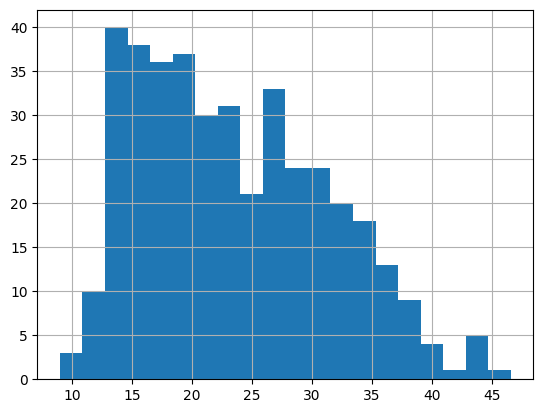

In [10]:
df = pd.read_csv("auto-mpg.csv")

print(df.info())
print(df.describe())
df['mpg'].hist(bins=20)


#### Task 2: Data Preprocessing
- Drop `car_name` since it's a unique identifier.
- Convert `horsepower` to numeric; handle `?` values with `errors='coerce'` and drop rows with NaNs.
- Define `X` and `y`, then split into train/test sets.

In [12]:
df = df.drop(columns=['car name'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

X = df.drop(columns=['mpg'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Task 3: Linear Regression
- Train a `LinearRegression()` model on the training data.
- Predict test values and calculate Mean Squared Error using `mean_squared_error()`.


In [13]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("MSE (Linear Regression):", mean_squared_error(y_test, y_pred_lr))


MSE (Linear Regression): 10.710864418838366


#### Task 4: Ridge Regularization
- Use `Ridge()` from `sklearn.linear_model` to test impact of L2 regularization.
- Compare MSE to the basic linear regression model.


In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("MSE (Ridge):", mean_squared_error(y_test, ridge.predict(X_test)))


MSE (Ridge): 10.702784548967243


#### Task 5: KNN Regression
- Train a `KNeighborsRegressor()` with default neighbors.
- Use `.predict()` to generate predictions and evaluate MSE.
- Try different `n_neighbors` values and observe changes.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
print("MSE (KNN Regression):", mean_squared_error(y_test, y_pred_knn))


MSE (KNN Regression): 17.752617721518984


# 🌸 Part 3: Clustering - Iris Dataset


The Iris dataset provides a classic setting for exploring machine learning techniques. This assignment introduces unsupervised learning through k-means clustering. The goal is to leverage the features of sepal length, sepal width, petal length, and petal width to explore natural groupings in the data.

## Objective

Explore unsupervised learning using k-means clustering to uncover natural groupings within the Iris dataset based solely on its features (sepal length, sepal width, petal length, and petal width), without relying on the actual species labels.

## Dataset

For this assignment, the Iris dataset will be used, featuring information on various attributes of iris flowers. The dataset comprises 150 samples and includes the following attributes:

1. `sepal_length`: Continuous feature representing the sepal length of the iris flower.
2. `sepal_width`: Continuous feature representing the sepal width of the iris flower.
3. `petal_length`: Continuous feature representing the petal length of the iris flower.
4. `petal_width`: Continuous feature representing the petal width of the iris flower.
5. `species`: Categorical target variable indicating the species of the iris flower (Setosa, Versicolor, or Virginica).


## Tasks

#### Task 1: Data Exploration
- Load iris dataset using `pd.read_csv()` from `iris.csv`
- Preview the dataset with `.head()` or `.describe()`.

In [16]:
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

#### Task 2: K-Means Clustering
- Use `KMeans(n_clusters=3)` to train clustering model.
- Predict cluster labels using `.fit_predict()`.
- Use `matplotlib.pyplot` to visualize clusters in 2D (e.g., sepal length vs sepal width).

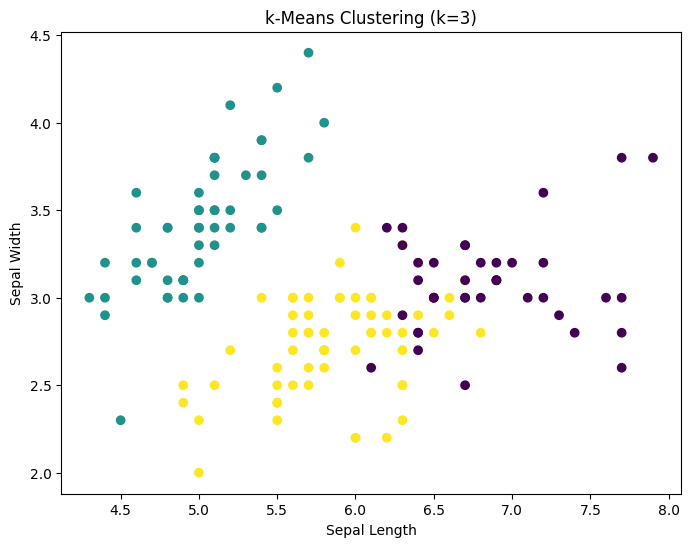

In [22]:
from sklearn.cluster import KMeans

X = df.drop(columns=['iris'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters

# Scatter plot for sepal length vs sepal width
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length'], df['sepal width'], c=clusters, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("k-Means Clustering (k=3)")
plt.show()
